# Import Libraries

In [1]:
# ------------ Libraries ------------#
from flask import Flask, render_template, url_for, request
import pandas as pd
import os

from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=2)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(loss = 'squared_error', criterion = 'friedman_mse')

from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from tensorflow.keras.layers import Dense
LSTM_model = Sequential()

# ------- My Libraries -------#
import All_Func
# ------- My Libraries -------#
# ------------ Libraries ------------#

---

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:1912
Press CTRL+C to quit


Extract:  1 ) BTCBUSD 

Extract:  2 ) ETHBUSD 

Extract:  3 ) BNBBUSD 

test.index[0]: 42756.61
test.index[0]: 2281.62
test.index[0]: 251.68


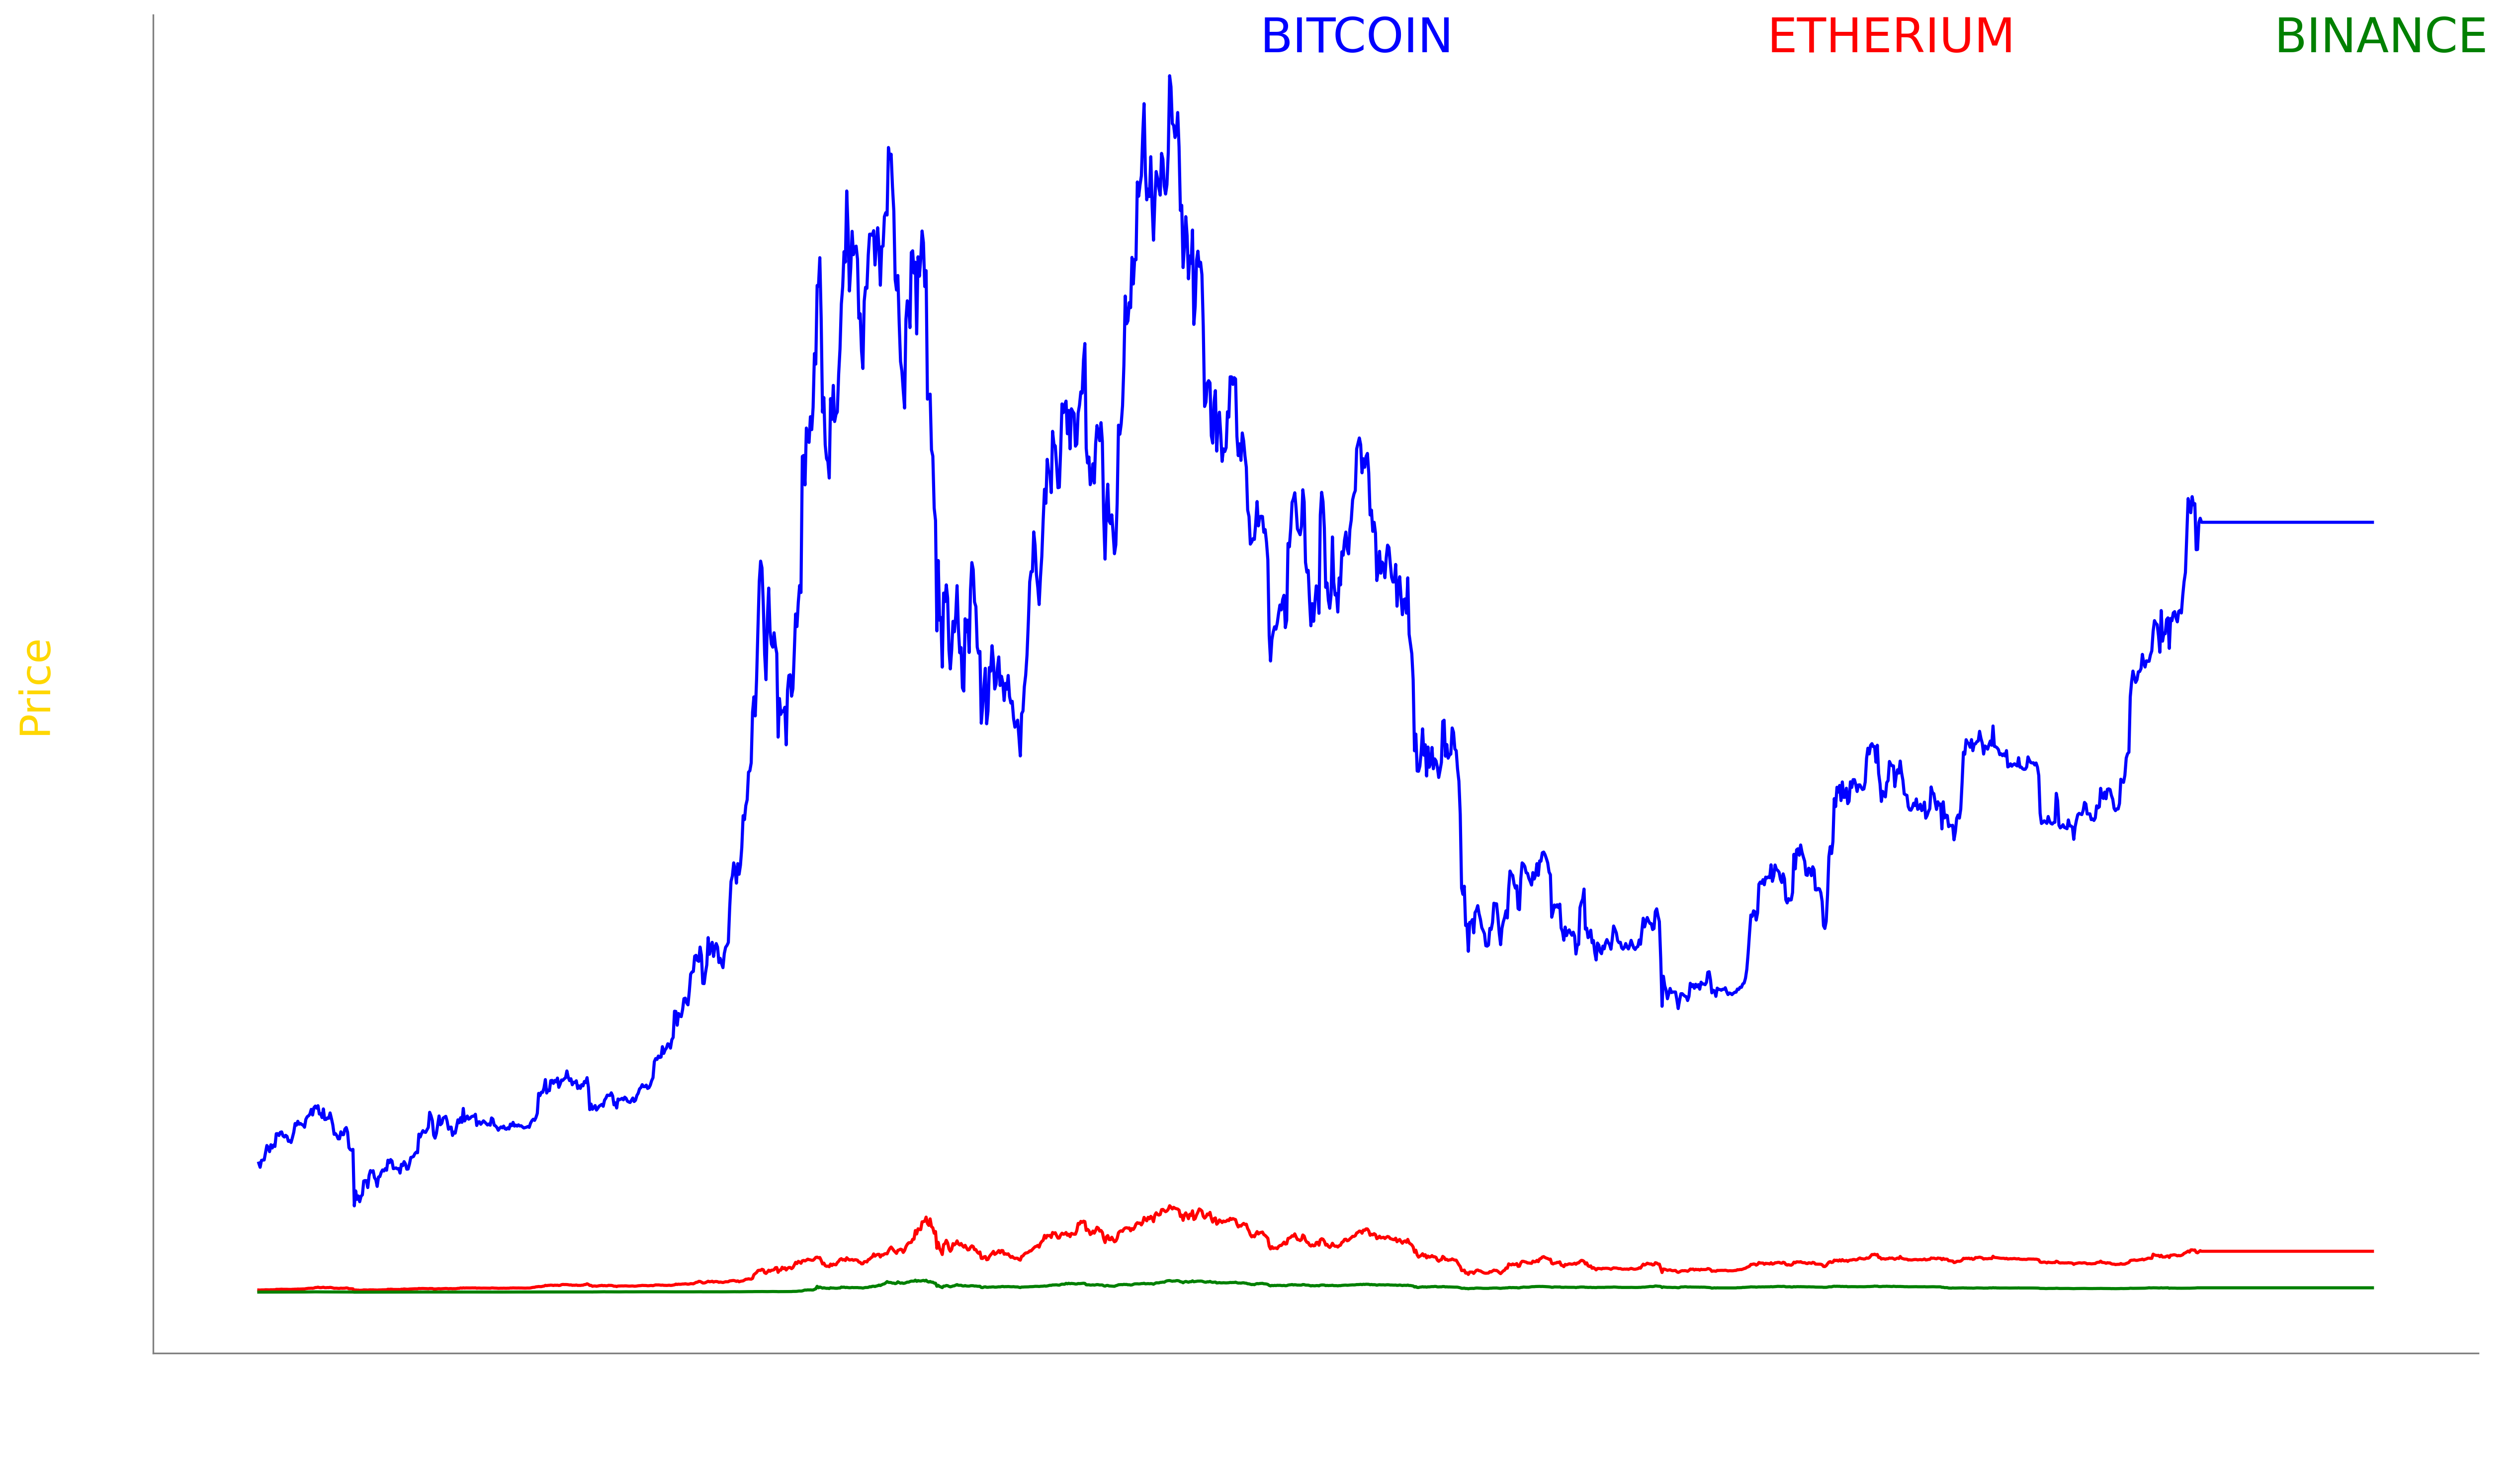

127.0.0.1 - - [20/Apr/2024 14:01:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Apr/2024 14:01:34] "GET /static/style.css HTTP/1.1" 200 -
127.0.0.1 - - [20/Apr/2024 14:01:34] "GET /static/images/bitcoin.png HTTP/1.1" 200 -
127.0.0.1 - - [20/Apr/2024 14:01:34] "GET /static/images/dollar.png HTTP/1.1" 200 -
127.0.0.1 - - [20/Apr/2024 14:01:34] "GET /static/images/ethereum.png HTTP/1.1" 200 -
127.0.0.1 - - [20/Apr/2024 14:01:34] "GET /static/images/binance.png HTTP/1.1" 200 -
127.0.0.1 - - [20/Apr/2024 14:01:34] "GET /static/cryptoPrice.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Apr/2024 14:01:34] "GET /static/script.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Apr/2024 14:01:34] "GET /static/images/logo.png HTTP/1.1" 200 -
127.0.0.1 - - [20/Apr/2024 14:01:34] "GET /static/images/bg.jpg HTTP/1.1" 200 -
127.0.0.1 - - [20/Apr/2024 14:01:35] "GET /static/images/dollar.png HTTP/1.1" 304 -


In [ ]:
#app = Flask(__name__, template_folder='../Application_Programming_Interface/Web/')
app = Flask(__name__, template_folder='../Application_Programming_Interface/')


@app.before_first_request
def bfr():
    try:
        #providing the path of the folder
        #r = raw string literal
        folder_path = (r'../Application_Programming_Interface/static/images/img_web/')
        #using listdir() method to list the files of the folder
        test = os.listdir(folder_path)
        #taking a loop to remove all the images
        #using ".png" extension to remove only png images
        #using os.remove() method to remove the files
        for images in test:
            if images.endswith(".png") or images.endswith(".gif"):
                os.remove(os.path.join(folder_path, images))
    except:
        print('Folder is null!')
    global df, btc_pred, eth_pred, bnb_pred, btc_close, eth_close, bnb_close
    df = All_Func.Extract_Data(3)
    df = df.astype(float)
    All_Func.set_null_value(dataframe=df)
    btc_close, eth_close, bnb_close = df[['BTCBUSD_Close','ETHBUSD_Close', 'BNBBUSD_Close']].iloc[-1]
    
    btc_df = df.copy()
    eth_df = df.copy()
    bnb_df = df.copy()
    btc_df.insert(0, 'Target_BTCBUSD_Close', btc_df['BTCBUSD_Close'].shift(-1))
    eth_df.insert(0, 'Target_ETHBUSD_Close', eth_df['ETHBUSD_Close'].shift(-1))
    bnb_df.insert(0, 'Target_BNBBUSD_Close', bnb_df['BNBBUSD_Close'].shift(-1))
    btc_df.dropna(inplace=True)
    eth_df.dropna(inplace=True)
    bnb_df.dropna(inplace=True)
    btc_pred = All_Func.forecasting(model1=lr, model2=dt, model3=rfr, model4=gbr, dataframe=btc_df)
    eth_pred = All_Func.forecasting(model1=lr, model2=dt, model3=rfr, model4=gbr, dataframe=eth_df)   
    bnb_pred = All_Func.forecasting(model1=lr, model2=dt, model3=rfr, model4=gbr, dataframe=bnb_df)
    btc_pred = round(btc_pred, 2)
    eth_pred = round(eth_pred, 2)
    bnb_pred = round(bnb_pred, 2)
    btc_close = round(btc_close, 2)
    eth_close = round(eth_close, 2)
    bnb_close = round(bnb_close, 2)
    All_Func.visualize_all_close_prices(dataframe=df)  
    

@app.route("/")
@app.route("/Home")
def Home():
    #return render_template('/Home.html')
    return render_template('/Web/Home.html', close1=btc_close, close2=eth_close, close3=bnb_close)
        
@app.route("/Evaluation", methods=['POST', 'GET'])
def Evaluation():
#    #return render_template('/....html')
    if request.method == 'POST':
        targ = request.form['target']
        #df = All_Func.Extract_Data(3)
        All_Func.Select_Target(dataframe=df, name_of_col=targ)
        All_Func.Convert_Type(dataframe=df)
        print('The Target is: ',targ)
        X_train, X_test, y_train, y_test = All_Func.train_test_split_df(dataframe=df, t_size=0.2, shuff=False)
        
        # --- Model Img ---#
        All_Func.Eval_Of_Model_Forecast(model=lr, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, name_of_img='1', model_type='ML')
        All_Func.Eval_Of_Model_Forecast(model=dt, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, name_of_img='2', model_type='ML')
        All_Func.Eval_Of_Model_Forecast(model=rfr, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, name_of_img='3', model_type='ML')
        All_Func.Eval_Of_Model_Forecast(model=gbr, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, name_of_img='4', model_type='ML')
        All_Func.Eval_Of_Model_Forecast(model=LSTM_model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, name_of_img='5', model_type='NN')
        # --- Model Img ---#
    return render_template('/Web/evaluation.html')

@app.route("/About")
def About():
    #return render_template('/....html')
    return render_template('/Web/about.html')

@app.route("/Login", methods=['POST', 'GET'])
def Login():
    if request.method == 'POST':
        return render_template('/Web/evaluation.html')
    return render_template('/Web/login.html')

@app.route("/Decision_Tree")
def ModelDT():
    #return render_template('/....html')
    return render_template('/Web/decision_tree.html')

@app.route("/Gradient_Boosting_Regressor")
def ModelGBR():
    #return render_template('/....html')
    return render_template('/Web/gradient_boosting_regressor.html')

@app.route("/Linear_Regression")
def ModelLR():
    #return render_template('/....html')
    return render_template('/Web/linear_regression.html')

@app.route("/Random_Forest_Regressor")
def ModelRFR():
    return render_template('/Web/random_forest_regressor.html')

@app.route("/LSTM")
def ModelLSTM():
    return render_template('/Web/long_sort_term_memory.html')
    

@app.route("/Forecasting")
def Forecasting():
    
    return render_template('/Web/forecasting.html', value1=btc_pred, value2=eth_pred, value3=bnb_pred, close1=btc_close, close2=eth_close, close3=bnb_close)

app.run(debug=False, port=1912)